# toma de datos desde web
# armado de dataframes
# pandas,numpy

In [1]:
from selenium import webdriver
import time

In [2]:
driver=webdriver.Chrome("chromedriver.exe")
driver.get("https://www.clasificados.clarin.com/inicio/index#!/")

titulos2=[]
subtitulos2=[]
listadesep=[]

def functionarie(lista,listasep):
    diccionario={}
    for i in lista:
        diccionario[i]=[]
    keys=[]
    keys.extend(diccionario.keys())
    key=keys[0]
    for i in listasep:
        if i in keys:
            key=i
        else:
            diccionario[key].append(i)
    return diccionario
        
for i in range(1,8):
    titulos=driver.find_element_by_xpath("/html/body/section[3]/section/article[2]/div/div/div[{}]/h2/a/span".format(i))
    #print("\n ------------------------")
    #print(titulos.text)
    titulos2.append(titulos.text)
    #print("\n ------------------------")
    listadesep.append(titulos.text)
    for j in range(1,5):
        subtitulos=driver.find_element_by_xpath("/html/body/section[3]/section/article[2]/div/div/div[{}]/ul/li[{}]".format(i,j))
        #print(subtitulos.text)
        subtitulos2.append(subtitulos.text)
        listadesep.append(subtitulos.text)


#print(titulos2,"\n",subtitulos2,"\n",listadesep)

diccionario=functionarie(titulos2,listadesep)
print(diccionario)
#print(listadesep)

time.sleep(2)


driver.close()

{'Inmuebles': ['Departamentos(3759)', 'Casas(512)', 'Locales Comerciales. Oficinas y Consultorios(334)', 'Habitaciones en Hoteles, Casas de Familias y Pensiones(199)'], 'Automotores': ['Automóviles Nacionales e Importados(710)', '4x4, Pick-up, Vans, Mini Vans, Utilitarios(99)', 'Taxis, Repuestos y Accesorios(40)', 'Planes de ahorro y Chocados(28)'], 'Empleos': ['Oficios y Ocupaciones Varias(700)', 'Choferes, Personal de Transporte y Abastecimiento, Autos(296)', 'Empleados(114)', 'Personal auxiliar de Casas Particulares. Hoteles, Clínicas(105)'], 'Servicios': ['Cuidado de Personas(465)', 'Astrología y Tarot(151)', 'Mudanzas, Fletes y Logística(62)', 'Construcción y Refacciones(50)'], 'Contactos': ['Agradecimientos(63)', 'Solos y Solas(12)', 'Mensajes y Saludos(5)', 'Sociales(1)'], 'Mix': ['Máquinas y otros materiales para industrias y negocios(35)', 'Mascotas y Animales(21)', 'Hogar y Muebles(17)', 'Boliches y Otros(13)'], 'Legales': ['Convocatorias(72)', 'Edictos Judiciales(44)', 'Avis

In [3]:
diccionario['Empleos']

['Oficios y Ocupaciones Varias(700)',
 'Choferes, Personal de Transporte y Abastecimiento, Autos(296)',
 'Empleados(114)',
 'Personal auxiliar de Casas Particulares. Hoteles, Clínicas(105)']

In [4]:
import pandas as pd

In [5]:
df2=pd.read_csv("test_clarin.csv")

In [6]:
df=pd.DataFrame.from_dict(diccionario,orient="index").reset_index()

In [7]:
df.iloc[:3,2]

0                                           Casas(512)
1       4x4, Pick-up, Vans, Mini Vans, Utilitarios(99)
2    Choferes, Personal de Transporte y Abastecimie...
Name: 1, dtype: object

In [8]:
diccionario2={"titulos":[],"subtitulos":[]}


In [9]:
for i in df.T:
    for j in df.T[i]:
        diccionario2["titulos"].append(df.iloc[i,0])
        diccionario2["subtitulos"].append(j)
for i in range(len(df2)):
    
    diccionario2["titulos"].append(df2.iloc[i,0])
    diccionario2["subtitulos"].append(df2.iloc[i,1])

datosF=pd.DataFrame(diccionario2)


In [10]:
datosF

,titulos,subtitulos
0,Inmuebles,Inmuebles
1,Inmuebles,Departamentos(3759)
2,Inmuebles,Casas(512)
3,Inmuebles,Locales Comerciales. Oficinas y Consultorios(334)
4,Inmuebles,"Habitaciones en Hoteles, Casas de Familias y P..."
5,Automotores,Automotores
6,Automotores,Automóviles Nacionales e Importados(710)
7,Automotores,"4x4, Pick-up, Vans, Mini Vans, Utilitarios(99)"
8,Automotores,"Taxis, Repuestos y Accesorios(40)"
9,Automotores,Planes de ahorro y Chocados(28)


In [11]:
X=datosF.iloc[:,0:1]
Y=datosF.iloc[:,1:]
Y=Y.values

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
x=[x for x in datosF['titulos']]
labelencoder_X=LabelEncoder()
labelencoder_X.fit(X)
X=labelencoder_X.transform(X)
clases={}
for i in range(len(X)):
    clases[X[i]]=x[i]
print(X)

[3 3 3 3 3 0 0 0 0 0 2 2 2 2 2 6 6 6 6 6 1 1 1 1 1 5 5 5 5 5 4 4 4 4 4 3 3
 3 3 0 0 0 0 0 2 2 2 2 2 6 6 6 6 6 5 5 5 5 5]


C:\Users\Stalker\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Stalker\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
cx=X.reshape(59,1).astype("float32")
onehotencoder=OneHotEncoder(categorical_features=[0])
X=onehotencoder.fit_transform(cx).toarray()
X

C:\Users\Stalker\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Stalker\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
 

In [15]:
from keras.preprocessing.text import one_hot
import numpy as np

Using TensorFlow backend.


In [16]:
len(set(Y[:,0]))

55

In [17]:
def one_hotear(vector,longitud):
    longitud=len(vector)
    yei=[]
    yei=[x for x in one_hot(str(vector[:,0]),longitud)]
    eldict={}
    yei=set(yei)
    joy=list(yei)
    for i in yei:
        eldict[i]=vector[i,0]
        
    yei=np.asarray(list(yei)).astype("int")
    return yei,eldict


In [18]:
yei,eldict=one_hotear(Y,len(Y))
len(yei)

57

In [19]:
eldict.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58])

In [28]:
eldict[34]

'Licitaciones(27)'

In [29]:
def vectorizar(sequences,dimension=0):
    results=np.zeros((len(sequences),dimension))
    for i,sequences in enumerate(sequences):
        results[i,sequences]=1.
    return results

In [30]:
yei_vect=vectorizar(yei,max(yei)+1)

In [31]:
from keras import models,layers

In [50]:
model=models.Sequential()
model.add(layers.Dense(10,activation='relu',input_shape=(59,)))
model.add(layers.Dense(14,activation='relu'))
model.add(layers.Dense(7,activation='softmax'))

In [51]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
Yvei=yei_vect[:35]
x_train=X[:35]
yei_val=yei_vect[35:]
x_val=X[35:]
print(len(x_train),len(Yvei))

35 35


In [53]:
history=model.fit(Yvei,x_train,epochs=250,batch_size=35,validation_data=(Yvei,x_train))

Train on 35 samples, validate on 35 samples
Epoch 1/250
35/35 [==============================] - 0s 14ms/step - loss: 0.4121 - acc: 0.8571 - val_loss: 0.4118 - val_acc: 0.8571
Epoch 2/250
35/35 [==============================] - 0s 143us/step - loss: 0.4118 - acc: 0.8571 - val_loss: 0.4115 - val_acc: 0.8571
Epoch 3/250
35/35 [==============================] - 0s 114us/step - loss: 0.4115 - acc: 0.8571 - val_loss: 0.4112 - val_acc: 0.8571
Epoch 4/250
35/35 [==============================] - 0s 143us/step - loss: 0.4112 - acc: 0.8571 - val_loss: 0.4108 - val_acc: 0.8571
Epoch 5/250
35/35 [==============================] - 0s 200us/step - loss: 0.4108 - acc: 0.8571 - val_loss: 0.4105 - val_acc: 0.8571
Epoch 6/250
35/35 [==============================] - 0s 171us/step - loss: 0.4105 - acc: 0.8571 - val_loss: 0.4102 - val_acc: 0.8571
Epoch 7/250
35/35 [==============================] - 0s 457us/step - loss: 0.4102 - acc: 0.8571 - val_loss: 0.4099 - val_acc: 0.8571
Epoch 8/250
35/35 [=======

Epoch 62/250
35/35 [==============================] - 0s 114us/step - loss: 0.3938 - acc: 0.8571 - val_loss: 0.3934 - val_acc: 0.8571
Epoch 63/250
35/35 [==============================] - 0s 200us/step - loss: 0.3934 - acc: 0.8571 - val_loss: 0.3930 - val_acc: 0.8571
Epoch 64/250
35/35 [==============================] - 0s 86us/step - loss: 0.3930 - acc: 0.8571 - val_loss: 0.3926 - val_acc: 0.8571
Epoch 65/250
35/35 [==============================] - 0s 114us/step - loss: 0.3926 - acc: 0.8571 - val_loss: 0.3922 - val_acc: 0.8571
Epoch 66/250
35/35 [==============================] - 0s 229us/step - loss: 0.3922 - acc: 0.8571 - val_loss: 0.3918 - val_acc: 0.8571
Epoch 67/250
35/35 [==============================] - 0s 86us/step - loss: 0.3918 - acc: 0.8571 - val_loss: 0.3914 - val_acc: 0.8571
Epoch 68/250
35/35 [==============================] - 0s 229us/step - loss: 0.3914 - acc: 0.8571 - val_loss: 0.3909 - val_acc: 0.8571
Epoch 69/250
35/35 [==============================] - 0s 86us/st

Epoch 124/250
35/35 [==============================] - 0s 86us/step - loss: 0.3497 - acc: 0.8571 - val_loss: 0.3486 - val_acc: 0.8571
Epoch 125/250
35/35 [==============================] - 0s 57us/step - loss: 0.3486 - acc: 0.8571 - val_loss: 0.3474 - val_acc: 0.8571
Epoch 126/250
35/35 [==============================] - 0s 143us/step - loss: 0.3474 - acc: 0.8571 - val_loss: 0.3463 - val_acc: 0.8571
Epoch 127/250
35/35 [==============================] - 0s 86us/step - loss: 0.3463 - acc: 0.8571 - val_loss: 0.3451 - val_acc: 0.8571
Epoch 128/250
35/35 [==============================] - 0s 286us/step - loss: 0.3451 - acc: 0.8571 - val_loss: 0.3439 - val_acc: 0.8571
Epoch 129/250
35/35 [==============================] - 0s 229us/step - loss: 0.3439 - acc: 0.8571 - val_loss: 0.3427 - val_acc: 0.8571
Epoch 130/250
35/35 [==============================] - 0s 86us/step - loss: 0.3427 - acc: 0.8571 - val_loss: 0.3414 - val_acc: 0.8571
Epoch 131/250
35/35 [==============================] - 0s 8

Epoch 185/250
35/35 [==============================] - 0s 343us/step - loss: 0.2616 - acc: 0.8980 - val_loss: 0.2600 - val_acc: 0.8980
Epoch 186/250
35/35 [==============================] - 0s 114us/step - loss: 0.2600 - acc: 0.8980 - val_loss: 0.2584 - val_acc: 0.9020
Epoch 187/250
35/35 [==============================] - 0s 114us/step - loss: 0.2584 - acc: 0.9020 - val_loss: 0.2567 - val_acc: 0.9020
Epoch 188/250
35/35 [==============================] - 0s 286us/step - loss: 0.2567 - acc: 0.9020 - val_loss: 0.2551 - val_acc: 0.9061
Epoch 189/250
35/35 [==============================] - 0s 200us/step - loss: 0.2551 - acc: 0.9061 - val_loss: 0.2535 - val_acc: 0.9102
Epoch 190/250
35/35 [==============================] - 0s 143us/step - loss: 0.2535 - acc: 0.9102 - val_loss: 0.2519 - val_acc: 0.9102
Epoch 191/250
35/35 [==============================] - 0s 200us/step - loss: 0.2519 - acc: 0.9102 - val_loss: 0.2503 - val_acc: 0.9102
Epoch 192/250
35/35 [==============================] - 

Epoch 246/250
35/35 [==============================] - 0s 286us/step - loss: 0.1667 - acc: 0.9388 - val_loss: 0.1653 - val_acc: 0.9388
Epoch 247/250
35/35 [==============================] - 0s 114us/step - loss: 0.1653 - acc: 0.9388 - val_loss: 0.1638 - val_acc: 0.9388
Epoch 248/250
35/35 [==============================] - 0s 86us/step - loss: 0.1638 - acc: 0.9388 - val_loss: 0.1624 - val_acc: 0.9388
Epoch 249/250
35/35 [==============================] - 0s 86us/step - loss: 0.1624 - acc: 0.9388 - val_loss: 0.1610 - val_acc: 0.9388
Epoch 250/250
35/35 [==============================] - 0s 114us/step - loss: 0.1610 - acc: 0.9388 - val_loss: 0.1595 - val_acc: 0.9388


In [55]:

"""    
for i in range(len(yei_vect)):
    log=int(i)
    try:
        print(eldict[log],clases[int(model.predict_classes(yei_vect[log].reshape(59,-1).T))],i)
    except:
        continue

"""

'    \nfor i in range(len(yei_vect)):\n    log=int(i)\n    try:\n        print(eldict[log],clases[int(model.predict_classes(yei_vect[log].reshape(59,-1).T))],i)\n    except:\n        continue\n\n'

In [58]:
log=int(53)
print(eldict[log],clases[int(model.predict_classes(yei_vect[log].reshape(59,-1).T))])

Legales(18) Inmuebles


In [38]:
import matplotlib.pyplot as plt

In [41]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

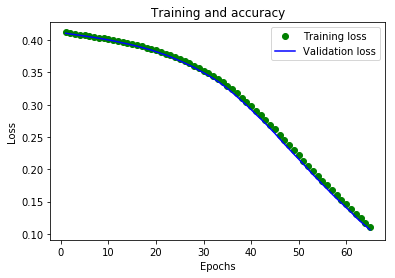

In [39]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'go',label='Training loss')
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.title('Training and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

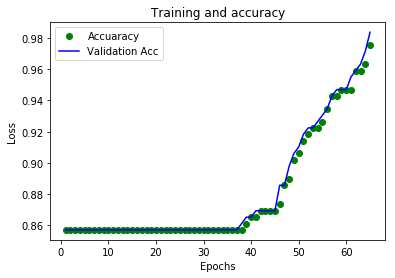

In [43]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'go',label='Accuaracy')
plt.plot(epochs,val_acc,'b',label="Validation Acc")
plt.title('Training and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()